### Importing all Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import xticks
%matplotlib inline

#### setting rows and columns and suppressing warnings

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the Datasets
df_leads = pd.read_csv('Leads.csv')

In [4]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df_leads.shape

(9240, 37)

In [6]:
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

### Data Cleaning

In [8]:
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# There are very high mumbers of missing values into the data provided
round(100*(df_leads.isnull().sum()/len(df_leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
# Column 'Lead Quality' having highest Null Values
df_leads['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

In [11]:
df_leads['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

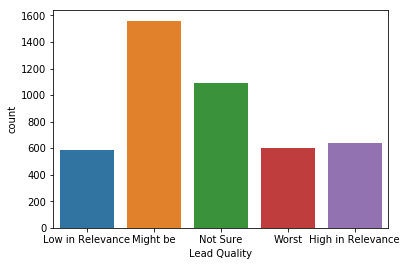

In [12]:
sns.countplot(df_leads['Lead Quality'])

In [13]:
# Lead Quality is based on intution. So will not be usefull for analysis; Hence dropping this fields from the dataset
df_leads.drop(['Lead Quality'], axis=1, inplace=True)

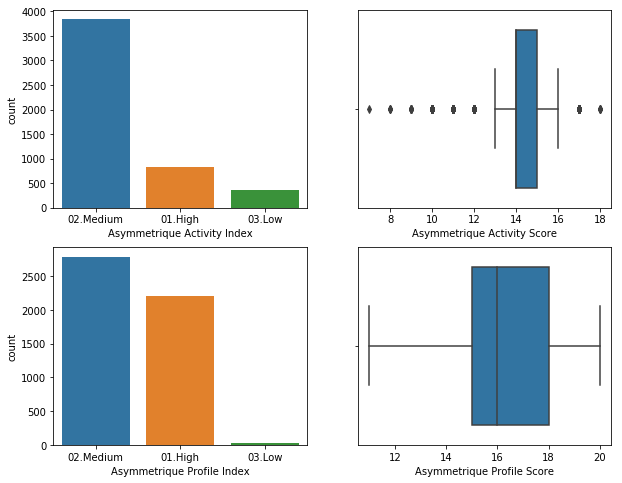

In [14]:
# An Index and score assigned to each customer based on activity and profile
fig,axes=plt.subplots(2,2, figsize=(10,8))
fig1 = sns.countplot(df_leads['Asymmetrique Activity Index'], ax=axes[0,0])
fig2 = sns.boxplot(df_leads['Asymmetrique Activity Score'], ax=axes[0,1])
fig3 = sns.countplot(df_leads['Asymmetrique Profile Index'], ax=axes[1,0])
fig4 = sns.boxplot(df_leads['Asymmetrique Profile Score'], ax=axes[1,1])

In [15]:
# There is too much variation in these parameters so it is not reliable to impute any value in it
df_leads = df_leads.drop(['Asymmetrique Activity Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Profile Score'],1)

In [16]:
round(100*(df_leads.isnull().sum()/len(df_leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [17]:
#Drop the missing value rows in the Dataframe
df_leads = df_leads[~pd.isnull(df_leads['TotalVisits'])]
df_leads = df_leads[~pd.isnull(df_leads['What is your current occupation'])]

In [18]:
#Checking more variables
df_leads['City'].describe()

count       6420
unique         7
top       Mumbai
freq        2449
Name: City, dtype: object

In [19]:
df_leads['City'].value_counts()

Mumbai                         2449
Select                         2181
Thane & Outskirts               586
Other Cities                    518
Other Cities of Maharashtra     342
Other Metro Cities              291
Tier II Cities                   53
Name: City, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

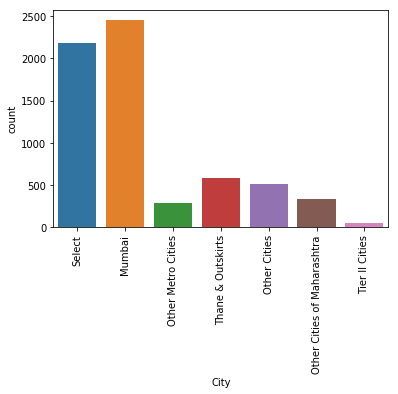

In [20]:
sns.countplot(df_leads['City'])
xticks(rotation=90)

In [21]:
#Select is also treated as missing values; hence it looks like huge number of data are missed out inlcluding Null values and Select values
df_leads.drop(['City'], axis=1, inplace=True)

In [22]:
#Checking on field: 'Country'
df_leads['Country'].describe()

count      4945
unique       33
top       India
freq       4744
Name: Country, dtype: object

In [23]:
df_leads['Country'].value_counts()

India                   4744
United States             46
United Arab Emirates      39
Singapore                 18
Saudi Arabia              16
United Kingdom            11
Qatar                      9
Australia                  8
Hong Kong                  6
Oman                       5
Bahrain                    5
France                     5
Nigeria                    3
Kuwait                     3
South Africa               3
Sweden                     2
Uganda                     2
Netherlands                2
Canada                     2
Germany                    2
Philippines                2
Russia                     1
Kenya                      1
China                      1
Vietnam                    1
Bangladesh                 1
Denmark                    1
Indonesia                  1
Malaysia                   1
Tanzania                   1
Ghana                      1
Sri Lanka                  1
Italy                      1
Name: Country, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

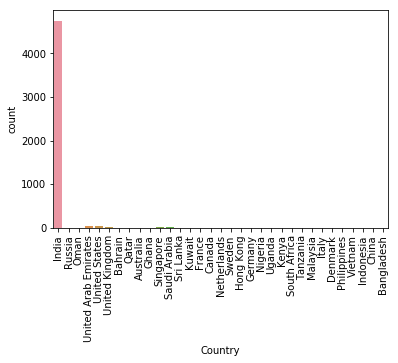

In [24]:
sns.countplot(df_leads.Country)
xticks(rotation=90)

In [25]:
# Country is India in maximum of the cases thus it seems to be of no use
df_leads.drop(['Country'],axis=1,inplace=True)

In [26]:
round(100*(df_leads.isnull().sum()/len(df_leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.45
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Specialization                                    0.28
How did you hear about X Education                0.30
What is your current occupation                   0.00
What matters most to you in choosing a course     0.30
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [27]:
df_leads.shape

(6420, 30)

In [28]:
#removing those fields with more than 10 % missing values
df_leads = df_leads.drop(df_leads.loc[:,list(round(100*(df_leads.isnull().sum()/len(df_leads.index)),2)>10)].columns, 1)

In [29]:
round(100*(df_leads.isnull().sum()/len(df_leads.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.45
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Last Activity                                    0.00
Specialization                                   0.28
How did you hear about X Education               0.30
What is your current occupation                  0.00
What matters most to you in choosing a course    0.30
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [30]:
df_leads['How did you hear about X Education'].describe()

count       6401
unique        10
top       Select
freq        4914
Name: How did you hear about X Education, dtype: object

In [31]:
df_leads['How did you hear about X Education'].value_counts()

Select                   4914
Online Search             604
Word Of Mouth             251
Student of SomeSchool     238
Other                     145
Multiple Sources          113
Social Media               52
Advertisements             50
Email                      22
SMS                        12
Name: How did you hear about X Education, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

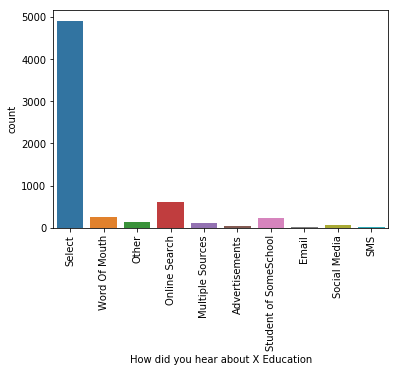

In [32]:
sns.countplot(df_leads['How did you hear about X Education'])
xticks(rotation=90)

In [33]:
df_leads['Lead Profile'].describe()

count       6401
unique         6
top       Select
freq        4079
Name: Lead Profile, dtype: object

In [34]:
df_leads['Lead Profile'].value_counts()

Select                         4079
Potential Lead                 1559
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

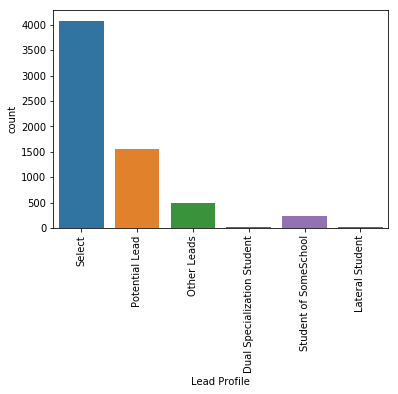

In [35]:
sns.countplot(df_leads['Lead Profile'])
xticks(rotation=90)

In [36]:
#Dropping these two fields as most of the data are with values select which is actually a missing value
df_leads.drop(['Lead Profile', 'How did you hear about X Education'],axis=1, inplace=True)

In [37]:
#Check on other field 'What matters most to you in choosing a course'
df_leads['What matters most to you in choosing a course'].describe()

count                        6401
unique                          3
top       Better Career Prospects
freq                         6399
Name: What matters most to you in choosing a course, dtype: object

In [38]:
df_leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6399
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

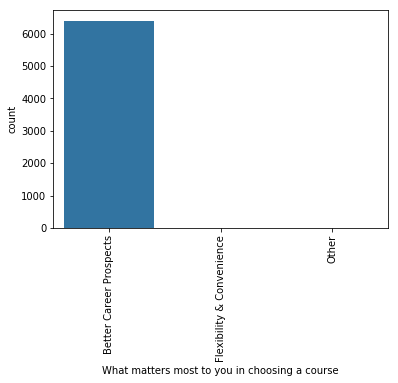

In [39]:
sns.countplot(df_leads['What matters most to you in choosing a course'])
xticks(rotation=90)

In [40]:
#Since most of the data are with values Better Career Prospoects; does not make sense to keep this field usefull for further analysis
df_leads.drop(['What matters most to you in choosing a course'],axis=1,inplace=True)

In [41]:
round(100*(df_leads.isnull().sum()/len(df_leads.index)),2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.45
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.00
Total Time Spent on Website                 0.00
Page Views Per Visit                        0.00
Last Activity                               0.00
Specialization                              0.28
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

In [42]:
#Now when we get the value count of all the columns, there were a few columns where only one value is present majorly; thus keeping these foields will not help to predict the conversion rate more
df_leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Digital Advertisement',
               'Newspaper', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
               'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1, inplace=True)

In [43]:
df_leads.shape

(6420, 14)

In [44]:
#look for the field "specializaion"
df_leads['Specialization'].describe()

count       6402
unique        19
top       Select
freq        1860
Name: Specialization, dtype: object

In [45]:
df_leads['Specialization'].value_counts()

Select                               1860
Finance Management                    748
Human Resource Management             666
Marketing Management                  664
Operations Management                 392
Business Administration               310
IT Projects Management                278
Supply Chain Management               275
Banking, Investment And Insurance     266
Media and Advertising                 161
Travel and Tourism                    149
International Business                136
Healthcare Management                 123
Hospitality Management                 90
E-COMMERCE                             80
Retail Management                      78
Rural and Agribusiness                 58
E-Business                             43
Services Excellence                    25
Name: Specialization, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

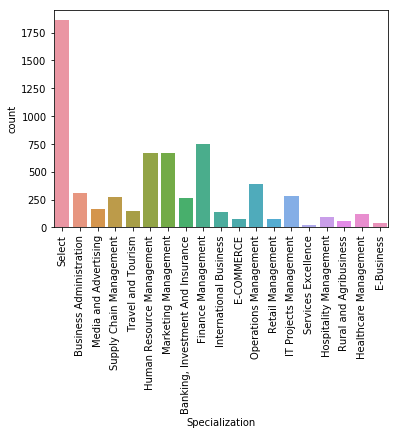

In [46]:
sns.countplot(df_leads['Specialization'])
xticks(rotation=90)

In [47]:
#since most of specialization values are with option select which is actually a missing values;
#dropping this field will not make any harm
df_leads.drop(['Specialization'],axis=1,inplace=True)

In [48]:
df_leads.shape

(6420, 13)

## EDA

In [49]:
# In this dataframe 'Converted' is a target variable which indicates whether a lead is converted ot not
converted = sum(df_leads['Converted']/len(df_leads['Converted'].index))*100
converted

48.14641744548113

In [50]:
# Conversion rate after data cleanup is showing as 48%

### Dummy Variable Creation

In [51]:
#Lets deal with Categorical variables into the Dataset
df_categorical = df_leads.loc[:,df_leads.dtypes=='object']
df_categorical.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [52]:
df_leads.drop(['Prospect ID', 'Lead Number'],1,inplace=True)

In [53]:
#Creating Dummy variables for the categorical fields
dummy_leads = pd.get_dummies(df_leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation',
                                       'A free copy of Mastering The Interview', 'Last Notable Activity']])

In [54]:
df_leads =pd.concat([df_leads,dummy_leads],axis=1)

In [55]:
#dropping original categorical variables
df_leads = df_leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 
       'Last Activity', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [56]:
df_leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_No,Do Not Email_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## Test Train Split

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X = df_leads.drop(['Converted'],1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_No,Do Not Email_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [59]:
#Putting the Target variable in y
y = df_leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [60]:
#split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=100)

### Scaling

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler_leads = MinMaxScaler()
fields_to_scale = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
X_train[fields_to_scale] = scaler_leads.fit_transform(X_train[fields_to_scale])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_No,Do Not Email_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6630,0.047619,0.084332,0.133333,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8176,0.047619,0.154461,0.066667,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4978,0.095238,0.498447,0.266667,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7457,0.119048,0.085664,0.333333,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4383,0.142857,0.234798,0.400000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [63]:
df_leads.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_No,Do Not Email_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Converted,1.000000,0.003768,0.308064,-0.065912,-5.047939e-02,-0.122992,0.294135,-0.021199,0.013419,-0.139135,-0.021199,0.019371,0.018320,-0.044583,-0.034495,-0.012027,-0.012027,0.241944,-0.023528,0.000655,0.012953,0.144165,-6.410158e-03,-0.012027,0.146640,-0.146640,0.028973,-0.140494,-0.138829,-0.033608,0.018320,-0.022701,0.018320,-0.037423,0.041357,-1.637997e-01,-0.088072,0.289293,-0.021415,-0.029440,-0.015727,-0.012027,0.010147,0.038884,1.148059e-02,-0.043525,-0.249362,0.301149,0.095060,-0.095060,0.012953,-0.053454,-0.026331,0.018320,-0.010810,0.012953,0.046747,-0.242506,-0.039174,-0.033055,0.287671,0.050186,-0.021310,-0.012027
TotalVisits,0.003768,1.000000,0.204907,0.490990,-1.447615e-01,0.269346,-0.212844,-0.043604,0.003202,0.075626,-0.041727,0.087775,-0.012631,-0.245856,0.193668,-0.001497,0.005937,-0.179064,0.078483,-0.003869,-0.003975,-0.096293,-4.023989e-03,0.003459,-0.023375,0.023375,-0.005565,-0.073554,-0.042843,-0.013094,0.001388,0.013933,0.006645,0.008115,0.020242,-7.494755e-02,0.210266,-0.041854,0.013932,-0.001128,0.018823,0.000981,0.011543,-0.008626,3.262814e-02,-0.033270,0.026283,-0.016205,-0.188825,0.188825,0.003459,-0.009218,0.003230,0.001388,0.028522,0.005937,0.026243,-0.087863,-0.004548,0.226501,-0.030949,0.003022,-0.001269,0.010893
Total Time Spent on Website,0.308064,0.204907,1.000000,0.306873,-1.246098e-01,0.277996,-0.255763,-0.062083,-0.001043,0.115468,-0.060459,0.229617,-0.016644,-0.317157,0.080518,-0.009006,-0.003858,-0.212917,0.018096,0.000637,0.014393,-0.118541,-1.241163e-02,-0.005051,0.057194,-0.057194,0.015874,-0.023970,-0.041090,-0.033775,0.012184,0.008377,0.014856,0.006238,0.025379,-1.155809e-01,0.030899,0.070612,-0.006430,-0.014005,-0.011357,-0.008741,0.011772,0.004625,3.183354e-02,-0.031108,-0.062162,0.081716,-0.156833,0.156833,0.022391,-0.013579,-0.030785,0.012184,0.021880,0.005046,0.024769,-0.104852,-0.009300,0.035668,0.078851,0.010573,-0.002340,-0.009801
Page Views Per Visit,-0.065912,0.490990,0.306873,1.000000,-2.583162e

### Model Building

In [64]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

### Feature selection using RFE

In [65]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,15)
rfe = rfe.fit(X_train, y_train)

In [66]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_API', False, 6),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 38),
 ('Lead Source_Click2call', False, 13),
 ('Lead Source_Direct Traffic', False, 19),
 ('Lead Source_Facebook', False, 18),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Live Chat', False, 45),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Pay per Click Ads', False, 46),
 ('Lead Source_Press_Release', False, 44),
 ('Lead Source_Reference', False, 33),
 ('Lead Source_Referral Sites', False, 20),
 ('Lead Source_Social Media', False, 8),
 ('Lead Source_WeLearn', False, 48),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 36),
 ('Lead Source_testone', False, 31),
 ('Do Not Email_No', False, 12),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_A

In [67]:
# Saving all columns by RFE
rfe_columns = X_train.columns[rfe.support_]
#Selecting the columns by RFE
X_train = X_train[rfe_columns]

### Fitting Logistics Regression

In [68]:
import statsmodels.api as sm

In [69]:
X_train_sme = sm.add_constant(X_train)
logmd1 = sm.GLM(y_train, X_train_sme, family=sm.families.Binomial())
resmd1 = logmd1.fit()
resmd1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4478
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2041.8
Date:                Mon, 18 Nov 2019   Deviance:                       4083.6
Time:                        16:33:35   Pearson chi2:                 4.69e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0790      0.589     -1.833      0.067      -2.233       0.075
TotalVisits                                              3.3898      0.599      5.660      0.000       2.216       4.564
Total Time Spent on Website                              4.5613      0.186     24.477      0.000       4.196       4.927
Page Views Per Visit                                    -1.3278      0.411     -3.232      0.001      -2.133      -0.522
Lead Origin_Lead Add Form                                4.0683      0.258     15.796      0.000       3.564       4.573
Lead Source_Olark Chat                                   1.5961      0.139     11.482      0.000       1.324       1.869
Lead Source_Welingak Website                             2.1995      1.038      2.120      0.034       0.166       4.233
Do Not Email_Yes                                        -1.6161      0.192     -8.399      0.000      -1.993      -1.239
Last Activity_Approached upfront                        23.5565   3.36e+04      0.001      0.999   -6.58e+04    6.59e+04
Last Activity_Olark Chat Conversation                   -1.1226      0.188     -5.956      0.000      -1.492      -0.753
Last Activity_SMS Sent                                   1.2896      0.085     15.203      0.000       1.123       1.456
What is your current occupation_Student                 -1.1395      0.616     -1.850      0.064      -2.347       0.068
What is your current occupation_Unemployed              -1.1652      0.580     -2.010      0.044      -2.301      -0.029
What is your current occupation_Working Professional     1.3008      0.607      2.144      0.032       0.111       2.490
Last Notable Activity_Had a Phone Conversation          24.2222   2.12e+04      0.001      0.999   -4.16e+04    4.17e+04
Last Notable Activity_Unreachable                        2.8377      0.800      3.545      0.000       1.269       4.407
========================================================================================================================
"""

In [70]:
#there are few variables with p-values > 0.05
#lets check using the same with VIF factor

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [72]:
#calculating VIF
vif_leads = pd.DataFrame()
vif_leads['Features'] = X_train.columns
vif_leads['VIF'] = [vif(X_train.values,i) for i in range(X_train.shape[1])]
vif_leads['VIF'] = round(vif_leads['VIF'],2)
vif_leads = vif_leads.sort_values(by="VIF", ascending=False)
vif_leads

,Features,VIF
11,What is your current occupation_Unemployed,6.05
2,Page Views Per Visit,5.31
0,TotalVisits,3.64
1,Total Time Spent on Website,2.37
3,Lead Origin_Lead Add Form,1.91
4,Lead Source_Olark Chat,1.84
12,What is your current occupation_Working Profes...,1.80
9,Last Activity_SMS Sent,1.65
5,Lead Source_Welingak Website,1.32
8,Last Activity_Olark Chat Conversation,1.21


In [73]:
#Ideally VIF factor should be less than 5; here are few fields for which VIF factor is higher than 5
#Considering VIF and P values > 0.05; lets drop variable which is having higher P values
X_train.drop(['Last Notable Activity_Had a Phone Conversation'], axis=1, inplace=True)

In [74]:
logmd2 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
resmd2 = logmd2.fit()
resmd2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4479
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2051.3
Date:                Mon, 18 Nov 2019   Deviance:                       4102.6
Time:                        16:33:35   Pearson chi2:                 4.70e+03
No. Iterations:                    20   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0783      0.588     -1.832      0.067      -2.232       0.075
TotalVisits                                              3.4321      0.598      5.743      0.000       2.261       4.603
Total Time Spent on Website                              4.5396      0.186     24.443      0.000       4.176       4.904
Page Views Per Visit                                    -1.3125      0.410     -3.204      0.001      -2.115      -0.510
Lead Origin_Lead Add Form                                4.0607      0.257     15.775      0.000       3.556       4.565
Lead Source_Olark Chat                                   1.5893      0.139     11.457      0.000       1.317       1.861
Lead Source_Welingak Website                             2.2001      1.038      2.120      0.034       0.166       4.234
Do Not Email_Yes                                        -1.6211      0.192     -8.437      0.000      -1.998      -1.245
Last Activity_Approached upfront                        21.5490   1.24e+04      0.002      0.999   -2.42e+04    2.42e+04
Last Activity_Olark Chat Conversation                   -1.1305      0.188     -6.002      0.000      -1.500      -0.761
Last Activity_SMS Sent                                   1.2766      0.085     15.085      0.000       1.111       1.442
What is your current occupation_Student                 -1.1343      0.616     -1.842      0.065      -2.341       0.073
What is your current occupation_Unemployed              -1.1527      0.579     -1.989      0.047      -2.288      -0.017
What is your current occupation_Working Professional     1.3089      0.607      2.158      0.031       0.120       2.498
Last Notable Activity_Unreachable                        2.8206      0.800      3.525      0.000       1.252       4.389
========================================================================================================================
"""

In [75]:
#Checking VIF factor for 2nd model
vif_leads = pd.DataFrame()
vif_leads['Features'] = X_train.columns
vif_leads['VIF'] = [vif(X_train.values,i) for i in range(X_train.shape[1])]
vif_leads['VIF'] = round(vif_leads['VIF'],2)
vif_leads = vif_leads.sort_values(by="VIF", ascending=False)
vif_leads

,Features,VIF
11,What is your current occupation_Unemployed,6.05
2,Page Views Per Visit,5.31
0,TotalVisits,3.64
1,Total Time Spent on Website,2.37
3,Lead Origin_Lead Add Form,1.91
4,Lead Source_Olark Chat,1.84
12,What is your current occupation_Working Profes...,1.80
9,Last Activity_SMS Sent,1.65
5,Lead Source_Welingak Website,1.32
8,Last Activity_Olark Chat Conversation,1.21


In [76]:
#Still an scope for removing a column with high P -values
X_train.drop(['Last Activity_Approached upfront'], axis=1, inplace=True)

In [77]:
logmd3 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
resmd3 = logmd3.fit()
resmd3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4480
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2054.8
Date:                Mon, 18 Nov 2019   Deviance:                       4109.5
Time:                        16:33:35   Pearson chi2:                 4.70e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0834      0.588     -1.841      0.066      -2.237       0.070
TotalVisits                                              3.4128      0.597      5.712      0.000       2.242       4.584
Total Time Spent on Website                              4.5488      0.186     24.502      0.000       4.185       4.913
Page Views Per Visit                                    -1.2965      0.409     -3.167      0.002      -2.099      -0.494
Lead Origin_Lead Add Form                                4.0628      0.257     15.783      0.000       3.558       4.567
Lead Source_Olark Chat                                   1.6040      0.139     11.574      0.000       1.332       1.876
Lead Source_Welingak Website                             2.2003      1.038      2.121      0.034       0.167       4.234
Do Not Email_Yes                                        -1.6241      0.192     -8.453      0.000      -2.001      -1.248
Last Activity_Olark Chat Conversation                   -1.1412      0.188     -6.061      0.000      -1.510      -0.772
Last Activity_SMS Sent                                   1.2705      0.085     15.022      0.000       1.105       1.436
What is your current occupation_Student                 -1.1338      0.616     -1.841      0.066      -2.341       0.073
What is your current occupation_Unemployed              -1.1468      0.579     -1.979      0.048      -2.282      -0.011
What is your current occupation_Working Professional     1.3115      0.607      2.162      0.031       0.122       2.501
Last Notable Activity_Unreachable                        2.8168      0.800      3.519      0.000       1.248       4.385
========================================================================================================================
"""

In [78]:
#Checking VIF factor for 3rd model
vif_leads = pd.DataFrame()
vif_leads['Features'] = X_train.columns
vif_leads['VIF'] = [vif(X_train.values,i) for i in range(X_train.shape[1])]
vif_leads['VIF'] = round(vif_leads['VIF'],2)
vif_leads = vif_leads.sort_values(by="VIF", ascending=False)
vif_leads

,Features,VIF
10,What is your current occupation_Unemployed,6.05
2,Page Views Per Visit,5.31
0,TotalVisits,3.64
1,Total Time Spent on Website,2.37
3,Lead Origin_Lead Add Form,1.91
4,Lead Source_Olark Chat,1.84
11,What is your current occupation_Working Profes...,1.80
8,Last Activity_SMS Sent,1.65
5,Lead Source_Welingak Website,1.32
7,Last Activity_Olark Chat Conversation,1.21


In [79]:
#Still we some some scope of removing one field
X_train.drop(['What is your current occupation_Student'], axis=1, inplace=True)

In [80]:
logmd4 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
resmd4 = logmd4.fit()
resmd4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4481
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2056.6
Date:                Mon, 18 Nov 2019   Deviance:                       4113.2
Time:                        16:33:35   Pearson chi2:                 4.71e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0722      0.220     -9.411      0.000      -2.504      -1.641
TotalVisits                                              3.4482      0.597      5.779      0.000       2.279       4.618
Total Time Spent on Website                              4.5564      0.186     24.552      0.000       4.193       4.920
Page Views Per Visit                                    -1.2897      0.409     -3.155      0.002      -2.091      -0.489
Lead Origin_Lead Add Form                                4.0727      0.257     15.832      0.000       3.569       4.577
Lead Source_Olark Chat                                   1.6066      0.138     11.606      0.000       1.335       1.878
Lead Source_Welingak Website                             2.1972      1.038      2.117      0.034       0.163       4.231
Do Not Email_Yes                                        -1.6288      0.192     -8.483      0.000      -2.005      -1.253
Last Activity_Olark Chat Conversation                   -1.1471      0.188     -6.089      0.000      -1.516      -0.778
Last Activity_SMS Sent                                   1.2672      0.085     14.981      0.000       1.101       1.433
What is your current occupation_Unemployed              -0.1634      0.200     -0.816      0.415      -0.556       0.229
What is your current occupation_Working Professional     2.2952      0.269      8.531      0.000       1.768       2.823
Last Notable Activity_Unreachable                        2.8233      0.799      3.532      0.000       1.257       4.390
========================================================================================================================
"""

In [81]:
#Also removing the field: What is your current occupation_Unemployed with P value > 0.05
X_train.drop(['What is your current occupation_Unemployed'], axis=1, inplace=True)

In [82]:
logmd5 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
resmd5 = logmd5.fit()
resmd5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4482
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2056.9
Date:                Mon, 18 Nov 2019   Deviance:                       4113.9
Time:                        16:33:36   Pearson chi2:                 4.71e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2285      0.110    -20.334      0.000      -2.443      -2.014
TotalVisits                                              3.4434      0.596      5.773      0.000       2.274       4.612
Total Time Spent on Website                              4.5597      0.186     24.574      0.000       4.196       4.923
Page Views Per Visit                                    -1.2903      0.409     -3.158      0.002      -2.091      -0.489
Lead Origin_Lead Add Form                                4.0800      0.257     15.868      0.000       3.576       4.584
Lead Source_Olark Chat                                   1.6097      0.138     11.629      0.000       1.338       1.881
Lead Source_Welingak Website                             2.1856      1.038      2.107      0.035       0.152       4.219
Do Not Email_Yes                                        -1.6305      0.192     -8.484      0.000      -2.007      -1.254
Last Activity_Olark Chat Conversation                   -1.1430      0.188     -6.073      0.000      -1.512      -0.774
Last Activity_SMS Sent                                   1.2627      0.084     14.966      0.000       1.097       1.428
What is your current occupation_Working Professional     2.4519      0.189     13.001      0.000       2.082       2.822
Last Notable Activity_Unreachable                        2.8186      0.799      3.528      0.000       1.253       4.385
========================================================================================================================
"""

In [83]:
#  P values looks promising
# lets check VIF
vif_leads = pd.DataFrame()
vif_leads['Features'] = X_train.columns
vif_leads['VIF'] = [vif(X_train.values,i) for i in range(X_train.shape[1])]
vif_leads['VIF'] = round(vif_leads['VIF'],2)
vif_leads = vif_leads.sort_values(by="VIF", ascending=False)
vif_leads

,Features,VIF
2,Page Views Per Visit,4.06
0,TotalVisits,3.53
1,Total Time Spent on Website,2.00
8,Last Activity_SMS Sent,1.58
3,Lead Origin_Lead Add Form,1.49
5,Lead Source_Welingak Website,1.32
4,Lead Source_Olark Chat,1.22
7,Last Activity_Olark Chat Conversation,1.19
9,What is your current occupation_Working Profes...,1.19
6,Do Not Email_Yes,1.06


In [84]:
# VIF is all the fields are also less than 5. hence model 5 with 10 fields looks promising to go ahead with prediction analysis

In [85]:
final_cols =[x for x in X_train.columns]
final_cols

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Do Not Email_Yes',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_SMS Sent',
 'What is your current occupation_Working Professional',
 'Last Notable Activity_Unreachable']

## Model Evaluation

In [86]:
y_train_pred = resmd5.predict(sm.add_constant(X_train))
y_train_pred[:10]

6630    0.135635
8176    0.069836
4978    0.784290
7457    0.134930
4383    0.234678
4152    0.655627
406     0.679449
8992    0.052236
1504    0.384159
66      0.420563
dtype: float64

In [87]:
#Creating a dataframne containing the converted flag
y_train_pred_2 = pd.DataFrame({'Converted': y_train.values, 'Conversion_Prob': y_train_pred})
y_train_pred_2.head()

,Converted,Conversion_Prob
6630,0,0.135635
8176,0,0.069836
4978,0,0.784290
7457,0,0.134930
4383,0,0.234678


In [88]:
#Creating a new columns 'Predcited' having values 1 if paid_prob > 0.5 else 0
y_train_pred_2['Predicted'] = y_train_pred_2.Conversion_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_2.head()

,Converted,Conversion_Prob,Predicted
6630,0,0.135635,0
8176,0,0.069836,0
4978,0,0.784290,1
7457,0,0.134930,0
4383,0,0.234678,0


#### Confusion Matrix

In [89]:
from sklearn import metrics

In [90]:
confusion_matrix = metrics.confusion_matrix(y_train_pred_2.Converted, y_train_pred_2.Predicted)
confusion_matrix

array([[1943,  398],
       [ 561, 1592]], dtype=int64)

In [91]:
#checking accuracy
metrics.accuracy_score(y_train_pred_2.Converted,y_train_pred_2.Predicted)

0.7866043613707165

In [92]:
#Evaluating Other Metrics
TP = confusion_matrix[1,1]
TN = confusion_matrix[0,0]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]

In [93]:
# Sensitivity
TP/(TP+ FN)

0.7394333488156062

In [94]:
#Spcificity
TN/(TN + FP)

0.8299871849636907

### Finidng Optimal Cutoff value

In [95]:
y_train_pred_2.shape

(4494, 3)

In [96]:
def roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize =(5,5))
    plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %auc_score)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1- True Negative rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating Characteristics example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [97]:
fpr, tpr, threhsolds = metrics.roc_curve(y_train_pred_2.Converted, y_train_pred_2.Conversion_Prob, drop_intermediate=False)

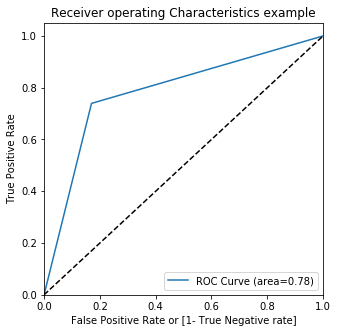

In [98]:
roc(y_train_pred_2.Converted, y_train_pred_2.Predicted)

In [99]:
# The AUC i'e area under the curve is 0.78 whcih is OK

In [100]:
#Columns with different probability cutoffs
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_2[i] = y_train_pred_2.Conversion_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_2.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
6630,0,0.135635,0,1,1,0,0,0,0,0,0,0,0
8176,0,0.069836,0,1,0,0,0,0,0,0,0,0,0
4978,0,0.784290,1,1,1,1,1,1,1,1,1,0,0
7457,0,0.134930,0,1,1,0,0,0,0,0,0,0,0
4383,0,0.234678,0,1,1,1,0,0,0,0,0,0,0


In [101]:
# Creating a dataframe to analyse the values of accuracy, sensitivity, and specificity.

Prob_cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

numbers = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_2.Converted, y_train_pred_2[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    Prob_cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(Prob_cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.479083     1.000000     0.000000
0.1          0.1  0.542501     0.993497     0.127723
0.2          0.2  0.721184     0.937761     0.521999
0.3          0.3  0.761460     0.902926     0.631354
0.4          0.4  0.791055     0.808175     0.775310
0.5          0.5  0.786604     0.739433     0.829987
0.6          0.6  0.775923     0.672550     0.870995
0.7          0.7  0.740765     0.546679     0.919265
0.8          0.8  0.713841     0.454250     0.952584
0.9          0.9  0.646195     0.278681     0.984195


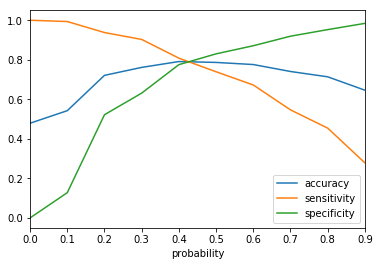

In [102]:
Prob_cutoff_df.plot.line(x = 'probability', y = ['accuracy', 'sensitivity', 'specificity'])
plt.show()

In [103]:
#Around 0.42 is the optimal values of the three metrics. Therefore our cutoff is now 0.42

In [104]:
y_train_pred_2['final_prediction'] = y_train_pred_2.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_2.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
6630,0,0.135635,0,1,1,0,0,0,0,0,0,0,0,0
8176,0,0.069836,0,1,0,0,0,0,0,0,0,0,0,0
4978,0,0.784290,1,1,1,1,1,1,1,1,1,0,0,1
7457,0,0.134930,0,1,1,0,0,0,0,0,0,0,0,0
4383,0,0.234678,0,1,1,1,0,0,0,0,0,0,0,0


In [105]:
# Accuracy
print(metrics.accuracy_score(y_train_pred_2.Converted,y_train_pred_2.Predicted ))

# Confusion Metrix
confusion_metrics_2 = metrics.confusion_matrix(y_train_pred_2.Converted, y_train_pred_2.final_prediction)
print(confusion_metrics_2)

# Other metrics
TP = confusion_metrics_2[1,1]
TN = confusion_metrics_2[0,0]
FP = confusion_metrics_2[0,1]
FN = confusion_metrics_2[1,0]

# Sensitivity
print(TP / (TP+FN))

# Specificity
print(TN / (TN+FP))


0.7866043613707165
[[1839  502]
 [ 447 1706]]
0.7923827217835578
0.785561725758223


### Prediction on Test set

In [106]:
X_test[fields_to_scale] = scaler_leads.transform(X_test[fields_to_scale])

In [107]:
# Selecting the columns in X_train for X_test
X_test = X_test[rfe_columns]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Approached upfront,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4051,0.095238,0.676431,0.133333,0,0,0,0,0,0,0,0,1,0,0,0
1696,0.071429,0.356414,0.200000,0,0,0,1,0,0,0,0,1,0,0,0
1325,0.214286,0.536174,0.600000,0,0,0,0,0,0,0,0,1,0,0,0
7991,0.071429,0.764314,0.100000,0,0,0,0,0,0,1,0,1,0,0,0
8177,0.071429,0.456724,0.200000,0,0,0,0,0,0,1,0,1,0,0,0


In [108]:
# Adding Constant
X_test_sme = sm.add_constant(X_test[final_cols])
X_test_sme

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
4051,1.0,0.095238,0.676431,0.133333,0,0,0,0,0,0,0,0
1696,1.0,0.071429,0.356414,0.200000,0,0,0,1,0,0,0,0
1325,1.0,0.214286,0.536174,0.600000,0,0,0,0,0,0,0,0
7991,1.0,0.071429,0.764314,0.100000,0,0,0,0,0,1,0,0
8177,1.0,0.071429,0.456724,0.200000,0,0,0,0,0,1,0,0
404,1.0,0.119048,0.600976,0.166667,0,0,0,0,0,0,0,0
6682,1.0,0.047619,0.027519,0.066667,0,0,0,0,0,0,0,0
5575,1.0,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0
5930,1.0,0.095238,0.281846,0.266667,0,0,0,0,1,0,0,0
8723,1.0,0.047619,0.101198,0.133333,0,0,0,0,0,0,0,0


In [109]:
y_test_pred = resmd5.predict(X_test_sme)
y_test_pred[:10]

4051    0.733361
1696    0.095695
1325    0.544880
7991    0.933155
8177    0.751128
404     0.669664
6682    0.116597
5575    0.864307
5930    0.108858
8723    0.144907
dtype: float64

In [110]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
4051,0.733361
1696,0.095695
1325,0.544880
7991,0.933155
8177,0.751128


In [111]:
y_test_df = pd.DataFrame(y_test)

In [112]:
# Remove index to append them side by side
y_pred.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

In [113]:
y_pred_2 = pd.concat([y_test_df, y_pred], axis =1)

In [114]:
y_pred_2.head()

,Converted,0
0,0,0.733361
1,1,0.095695
2,0,0.544880
3,0,0.933155
4,1,0.751128


In [115]:
y_pred_2= y_pred_2.rename(columns = {0 : 'Conversion_Probability'})
y_pred_2.head()

,Converted,Conversion_Probability
0,0,0.733361
1,1,0.095695
2,0,0.544880
3,0,0.933155
4,1,0.751128


In [116]:
y_pred_2['final_prediction'] = y_pred_2.Conversion_Probability.map(lambda x: 1 if x > 0.45 else 0)
y_pred_2.head()

,Converted,Conversion_Probability,final_prediction
0,0,0.733361,1
1,1,0.095695,0
2,0,0.544880,1
3,0,0.933155,1
4,1,0.751128,1


In [117]:
# Overall Accuracy
metrics.accuracy_score(y_pred_2['Converted'], y_pred_2.final_prediction)

0.7834890965732088

In [118]:
confusion_metrix_2 = metrics.confusion_matrix(y_pred_2['Converted'], y_pred_2.final_prediction)
confusion_metrix_2

array([[777, 211],
       [206, 732]], dtype=int64)

In [119]:
TP = confusion_metrix_2[1,1]
TN = confusion_metrix_2[0,0]
FP = confusion_metrix_2[0,1]
FN = confusion_metrix_2[1,0]

In [120]:
# Sensitivity
TP/ float(TP+FN)

0.7803837953091685

In [121]:
# Specificity
TN/float(TN+FP)

0.7864372469635628

### Precison Re-call review

In [122]:
confusion_metrix =  metrics.confusion_matrix(y_train_pred_2.Converted, y_train_pred_2.Predicted)
confusion_metrix

array([[1943,  398],
       [ 561, 1592]], dtype=int64)

In [123]:
# Precision
#TP/(TP+FP)
confusion_metrix[1,1]/(confusion_metrix[0,1]+confusion_metrix[1,1])

0.8

In [124]:
# Recall
# TP/(TP+FN)
confusion_metrix[1,1]/(confusion_metrix[1,0]+confusion_metrix[1,1])

0.7394333488156062

In [125]:
# Precision and recall Tradeoff
from sklearn.metrics import precision_recall_curve

In [126]:
y_train_pred_2.Converted, y_train_pred_2.Predicted

(6630    0
 8176    0
 4978    0
 7457    0
 4383    0
 4152    0
 406     1
 8992    0
 1504    0
 66      1
 8381    0
 2830    0
 8659    0
 513     1
 7260    0
 8643    0
 8402    1
 7726    0
 8008    1
 6718    0
 4305    1
 661     1
 9068    1
 5571    1
 6775    0
 6714    1
 7035    1
 3880    0
 4698    0
 1745    1
 7415    0
 8427    0
 3535    1
 5593    0
 1326    1
 7871    0
 6455    0
 5824    1
 7624    0
 494     1
 1336    0
 4734    1
 259     0
 8722    1
 5375    0
 5509    1
 9019    0
 3690    0
 533     1
 846     1
        ..
 3840    1
 6883    1
 1387    1
 2       1
 5082    0
 7079    0
 4547    1
 5604    0
 7101    0
 3567    0
 5618    0
 5219    1
 8916    0
 6289    0
 4351    0
 5982    0
 4031    1
 1568    1
 6876    0
 8452    1
 4816    1
 7245    1
 3740    1
 8692    0
 2791    1
 8370    1
 3689    0
 8966    1
 8343    0
 2246    1
 4453    1
 1990    1
 2789    1
 4945    0
 2457    1
 6481    0
 4224    1
 7405    0
 1282    0
 8170    0

In [127]:
precision, recall, threshold = precision_recall_curve(y_train_pred_2.Converted, y_train_pred_2.Conversion_Prob)

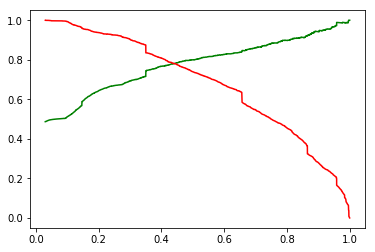

In [128]:
plt.plot(threshold, precision[:-1], "g-")
plt.plot(threshold, recall[:-1], "r-")
plt.show()

In [129]:
y_train_pred_2['final_prediction'] = y_train_pred_2.Conversion_Prob.map(lambda x : 1 if x> 0.44 else 0)

In [130]:
y_train_pred_2.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
6630,0,0.135635,0,1,1,0,0,0,0,0,0,0,0,0
8176,0,0.069836,0,1,0,0,0,0,0,0,0,0,0,0
4978,0,0.784290,1,1,1,1,1,1,1,1,1,0,0,1
7457,0,0.134930,0,1,1,0,0,0,0,0,0,0,0,0
4383,0,0.234678,0,1,1,1,0,0,0,0,0,0,0,0


In [131]:
# Accuracy 
metrics.accuracy_score(y_pred_2['Converted'], y_pred_2.final_prediction)

0.7834890965732088

In [132]:
# Confusion Metrix
confusion_metrix_2 =  metrics.confusion_matrix(y_train_pred_2.Converted, y_train_pred_2.Predicted)
confusion_metrix_2

array([[1943,  398],
       [ 561, 1592]], dtype=int64)

In [133]:
# All metrics
TP = confusion_metrix_2[1,1]
TN = confusion_metrix_2[0,0]
FP = confusion_metrix_2[0,1]
FN = confusion_metrix_2[1,0]

In [134]:
# Precision
TP/(TP+FP)

0.8

In [135]:
# Recall
TP/(TP+FN)

0.7394333488156062

#### Making Predictions on the Test Set

In [136]:
y_test_pred = resmd5.predict(X_test_sme)

In [137]:
y_test_pred[:10]

4051    0.733361
1696    0.095695
1325    0.544880
7991    0.933155
8177    0.751128
404     0.669664
6682    0.116597
5575    0.864307
5930    0.108858
8723    0.144907
dtype: float64

In [138]:
# Converting pred to a dataframe
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
4051,0.733361
1696,0.095695
1325,0.544880
7991,0.933155
8177,0.751128


In [139]:
# Converting y_test to Dataframe
y_test_2 = pd.DataFrame(y_test)

In [140]:
y_pred_df.reset_index(drop = True, inplace = True)
y_test_2.reset_index(drop = True, inplace = True)

In [141]:
y_pred_3 = pd.concat([y_test_2, y_pred_df], axis = 1)

In [142]:
y_pred_3.head()

,Converted,0
0,0,0.733361
1,1,0.095695
2,0,0.544880
3,0,0.933155
4,1,0.751128


In [143]:
# Rename the column
y_pred_3 = y_pred_3.rename(columns = {0 : 'Conversion_Probability'})

In [144]:
y_pred_3.head()

,Converted,Conversion_Probability
0,0,0.733361
1,1,0.095695
2,0,0.544880
3,0,0.933155
4,1,0.751128


In [145]:
# Make Predictions
y_pred_3['final_prediction'] = y_pred_3.Conversion_Probability.map(lambda x:1 if x>0.46 else 0) 

In [146]:
# Overall Accuracy
metrics.accuracy_score(y_pred_3['Converted'], y_pred_3.final_prediction)

0.7808930425752856

In [147]:
confusion_metrix_2 =  metrics.confusion_matrix(y_pred_3.Converted, y_pred_3.final_prediction)
confusion_metrix_2

array([[780, 208],
       [214, 724]], dtype=int64)

In [148]:
# All metrics
TP = confusion_metrix_2[1,1]
TN = confusion_metrix_2[0,0]
FP = confusion_metrix_2[0,1]
FN = confusion_metrix_2[1,0]

In [149]:
# Precision
TP/(TP+FP)

0.776824034334764

In [150]:
# Recall
TP/(TP+FN)

0.7718550106609808

In [151]:
#This looks promising with respect to other cutoff values